# Imports

In [1]:
from architectures.lenet5 import LeNet5
from Datasets import Datasets
from sklearn.model_selection import KFold
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import keras

# Load Data

In [2]:
X_train, Y_train, X_test, Y_test = Datasets.load_cifar10()
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train/255.
X_test = X_test/255.

_, x_size, y_size, n_filters = X_train.shape
_, classes = Y_train.shape

In [3]:
learning_rates = [0.001 * (x ** 2) for x in range(1, 11)]
print(learning_rates)

[0.001, 0.004, 0.009000000000000001, 0.016, 0.025, 0.036000000000000004, 0.049, 0.064, 0.081, 0.1]


Epoch 1/10
781/781 [==============================] - 214s 251ms/step - loss: 2.3026 - accuracy: 0.0948 - val_loss: 2.3027 - val_accuracy: 0.0964
Epoch 2/10
781/781 [==============================] - 193s 247ms/step - loss: 2.3026 - accuracy: 0.1043 - val_loss: 2.3027 - val_accuracy: 0.0964
Epoch 3/10
781/781 [==============================] - 197s 253ms/step - loss: 2.3025 - accuracy: 0.1007 - val_loss: 2.3027 - val_accuracy: 0.0964
Epoch 4/10
781/781 [==============================] - 195s 250ms/step - loss: 2.3024 - accuracy: 0.1052 - val_loss: 2.3027 - val_accuracy: 0.0964
Epoch 5/10
781/781 [==============================] - 197s 252ms/step - loss: 2.3023 - accuracy: 0.1072 - val_loss: 2.3027 - val_accuracy: 0.0964
Epoch 6/10
781/781 [==============================] - 195s 250ms/step - loss: 2.3024 - accuracy: 0.1046 - val_loss: 2.3027 - val_accuracy: 0.0964
Epoch 7/10
781/781 [==============================] - 193s 247ms/step - loss: 2.3022 - accuracy: 0.1069 - val_loss: 2.3026 -

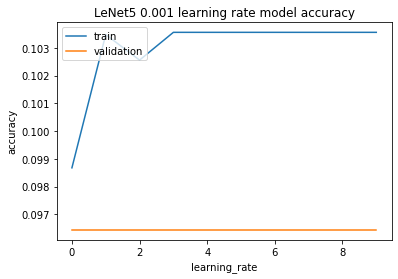

Epoch 1/10
781/781 [==============================] - 194s 248ms/step - loss: 2.3026 - accuracy: 0.1014 - val_loss: 2.3027 - val_accuracy: 0.0985
Epoch 2/10
781/781 [==============================] - 237s 304ms/step - loss: 2.3025 - accuracy: 0.0983 - val_loss: 2.3027 - val_accuracy: 0.0985
Epoch 3/10
781/781 [==============================] - 210s 268ms/step - loss: 2.3026 - accuracy: 0.1004 - val_loss: 2.3027 - val_accuracy: 0.0922
Epoch 4/10
781/781 [==============================] - 193s 247ms/step - loss: 2.3025 - accuracy: 0.0987 - val_loss: 2.3027 - val_accuracy: 0.0985
Epoch 5/10
781/781 [==============================] - 194s 249ms/step - loss: 2.3025 - accuracy: 0.1015 - val_loss: 2.3027 - val_accuracy: 0.0985
Epoch 6/10
781/781 [==============================] - 192s 246ms/step - loss: 2.3025 - accuracy: 0.0988 - val_loss: 2.3027 - val_accuracy: 0.0985
Epoch 7/10
781/781 [==============================] - 192s 245ms/step - loss: 2.3023 - accuracy: 0.1047 - val_loss: 2.3027 -

In [ ]:
# Prepare data for cross validation
kf = KFold(n_splits=2) 
kf.get_n_splits(X_train)

for learning_rate in learning_rates:
    for train_index, test_index in kf.split(X_train):

        # Build model
        model = LeNet5(input_shape = (x_size, y_size, n_filters),
                        classes = classes,
                        optimizer=keras.optimizers.gradient_descent_v2.SGD(learning_rate=learning_rate))

        # Generate extra data
        datagen = ImageDataGenerator(width_shift_range=0.1,
                        height_shift_range=0.1,
                        zoom_range=0.2,
                        fill_mode='nearest',
                        horizontal_flip = True)
        datagen.fit(X_train)

        X_tr = X_train[train_index]
        Y_tr = Y_train[train_index]
        X_vl = X_train[test_index]
        Y_vl = Y_train[test_index]

        # Create history
        batch_size = 32
        history = model.fit(datagen.flow(X_tr, Y_tr, batch_size=batch_size),
                              validation_data=(X_vl, Y_vl),
                              epochs=10, steps_per_epoch=len(X_tr)/batch_size)

        
        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
        plt.title('LeNet5 ' + str(learning_rate) + ' learning rate model accuracy')
        plt.ylabel('accuracy')
        plt.xlabel('learning_rate')
        plt.legend(['train', 'validation'], loc='upper left')
        plt.show()



<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=64d23a20-b5bc-41cc-930c-3bd7ede12b0c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>